In [1]:
import seaborn as sns
import csidata as cid


In [18]:
# res = cid.load('recordings/csi/2024-09-23T17-23-22_916551.raw') # jann 
# res = cid.load('recordings/csi/2024-09-24T16-57-45_776611.raw') # felix vorbeilaufen
# res = cid.load('recordings/csi/2024-09-24T17-56-41_341464.raw') # print time inside send loop 1000us
# res = cid.load('recordings/csi/2024-09-24T17-58-29_071208.raw') # NO print time inside send loop 1000us
# res = cid.load('recordings/csi/2024-09-24T19-15-27_005307.raw') # real time scheduling usleep 1000us
# res = cid.load('recordings/csi/2024-09-24T19-21-53_719329.raw') # real time scheduling nanosleep 1000us

# res = cid.load('recordings/csi/2024-09-26T12-45-47_637384.raw') # iw antenna 0x3
# res = cid.load('recordings/csi/2024-09-26T13-44-41_161150.raw') # iw antenna 0x3 mcs 7
# res = cid.load('recordings/csi/2024-09-26T13-57-59_557757.raw') # iw antenna 0x1 mcs 7
res = cid.load('recordings/csi/2024-09-26T14-01-45_158166.raw') # iw antenna 0x1 mcs 7 / rx antenna 0x1




verbose: False


In [20]:
res.csi.shape

(10784, 3, 3, 56)

<Axes: ylabel='Count'>

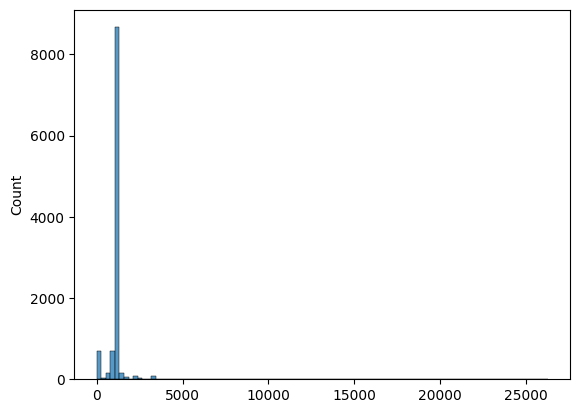

In [21]:
sns.histplot(cid.stats.get_intervals(res)[1:], bins=100)

<Axes: >

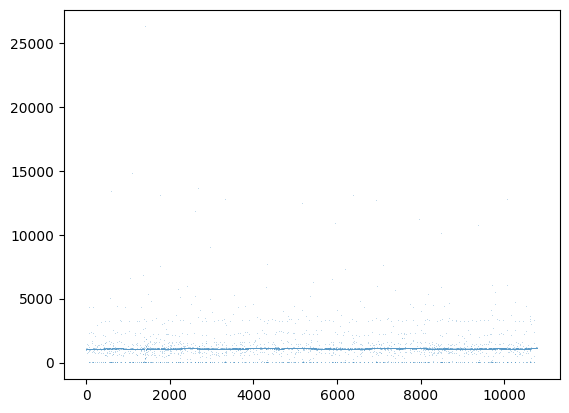

In [32]:
sns.scatterplot(cid.stats.get_intervals(res)[1:], alpha=1, s=0.2)

In [23]:
res.csi.shape

(10784, 3, 3, 56)

<Axes: >

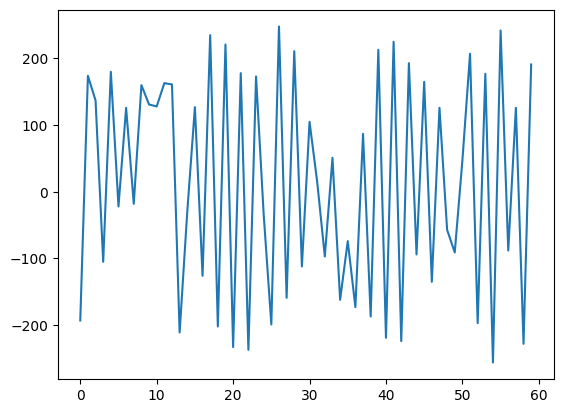

In [33]:
sns.lineplot(res.csi[:60,0,0,1])

In [25]:
tstamps = map(lambda x: x.tstamp, res.status)
tstamps = list(tstamps)
tstamps

[1727352105428431,
 1727352105429501,
 1727352105430568,
 1727352105431582,
 1727352105432696,
 1727352105433785,
 1727352105434875,
 1727352105435936,
 1727352105437016,
 1727352105438071,
 1727352105439091,
 1727352105440510,
 1727352105441260,
 1727352105442333,
 1727352105443377,
 1727352105444464,
 1727352105445553,
 1727352105446618,
 1727352105447708,
 1727352105448800,
 1727352105449889,
 1727352105450979,
 1727352105452122,
 1727352105453182,
 1727352105454226,
 1727352105455269,
 1727352105456360,
 1727352105457452,
 1727352105458542,
 1727352105459633,
 1727352105460726,
 1727352105461760,
 1727352105462852,
 1727352105463942,
 1727352105465037,
 1727352105466127,
 1727352105467469,
 1727352105468279,
 1727352105469372,
 1727352105470465,
 1727352105471557,
 1727352105472644,
 1727352105473740,
 1727352105474830,
 1727352105475923,
 1727352105477019,
 1727352105478111,
 1727352105479198,
 1727352105480291,
 1727352105481383,
 1727352105482471,
 1727352105483527,
 17273521054

In [26]:
import pandas as pd
pd.to_datetime(tstamps, unit='us')

DatetimeIndex(['2024-09-26 12:01:45.428431', '2024-09-26 12:01:45.429501',
               '2024-09-26 12:01:45.430568', '2024-09-26 12:01:45.431582',
               '2024-09-26 12:01:45.432696', '2024-09-26 12:01:45.433785',
               '2024-09-26 12:01:45.434875', '2024-09-26 12:01:45.435936',
               '2024-09-26 12:01:45.437016', '2024-09-26 12:01:45.438071',
               ...
               '2024-09-26 12:01:57.362278', '2024-09-26 12:01:57.363425',
               '2024-09-26 12:01:57.364573', '2024-09-26 12:01:57.365725',
               '2024-09-26 12:01:57.366884', '2024-09-26 12:01:57.368011',
               '2024-09-26 12:01:57.369171', '2024-09-26 12:01:57.370303',
               '2024-09-26 12:01:57.371497', '2024-09-26 12:01:57.372619'],
              dtype='datetime64[ns]', length=10784, freq=None)

In [34]:
link_info = [[s.nc, s.nr, s.rate, s.num_tones] for s in res.status] 
pd.value_counts(link_info)
# link_info

/tmp/ipykernel_105357/4222198260.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(link_info)
/tmp/ipykernel_105357/4222198260.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(link_info)


[1, 1, 135, 56]    10784
Name: count, dtype: int64